# Air Quality Analysis in Tamil Nadu

## Importing the libraries

In [5]:
import numpy as np   
import pandas as pd     
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

In [6]:
aq=pd.read_csv("/Users/prashantkumar/Desktop/MP_ROOT/cpcb_dly_aq_tamil_nadu-2014.csv")
aq.tail(5)

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
2874,773,12-03-14,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",15.0,18.0,102.0,NaN
2875,773,12-10-14,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",12.0,14.0,91.0,NaN
2876,773,17-12-14,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",19.0,22.0,100.0,NaN
2877,773,24-12-14,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",15.0,17.0,95.0,NaN
2878,773,31-12-14,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",14.0,16.0,94.0,NaN


In [7]:
aq.shape


(2879, 11)

In [8]:
# Extracting Tamil Nadu state data alone
tn = aq.query('State=="Tamil Nadu" ')
tn.sample(2)


,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
1709,307,04-02-14,Tamil Nadu,Madurai,Fenner (I) Ltd. Employees Assiciation Building...,Tamilnadu State Pollution Control Board,Industrial Area,19.0,55.0,34.0,NaN
2746,772,25-02-14,Tamil Nadu,Trichy,"Golden Rock, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",11.0,13.0,34.0,NaN


In [9]:
tn.shape


(2879, 11)

In [10]:
tn.describe(include = 'all')


,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
count,2879.000000,2879,2879,2879,2879,2879,2879,2868.000000,2866.000000,2875.000000,0.0
unique,NaN,302,1,8,30,2,2,NaN,NaN,NaN,NaN
top,NaN,28-08-14,Tamil Nadu,Chennai,"Sowdeswari College Building, Salem",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",NaN,NaN,NaN,NaN
freq,NaN,15,2879,1000,131,2619,2008,NaN,NaN,NaN,NaN
mean,475.750261,NaN,NaN,NaN,NaN,NaN,NaN,11.503138,22.136776,62.494261,NaN
std,277.675577,NaN,NaN,NaN,NaN,NaN,NaN,5.051702,7.128694,31.368745,NaN
min,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,5.000000,12.000000,NaN
25%,238.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,17.000000,41.000000,NaN
50%,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,22.000000,55.000000,NaN
75%,764.000000,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,25.000000,78.000000,NaN


## Feature Engineering


Removing unnecessary datas


In [11]:
tn.drop(labels=['Stn Code','Sampling Date','Agency','Location of Monitoring Station'], axis = 1, inplace = True)
tn.sample(2)

,State,City/Town/Village/Area,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
1235,Tamil Nadu,Coimbatore,"Residential, Rural and other Areas",5.0,34.0,22.0,NaN
2572,Tamil Nadu,Trichy,"Residential, Rural and other Areas",19.0,21.0,86.0,NaN


In [12]:
tn.isnull().sum()


State                        0
City/Town/Village/Area       0
Type of Location             0
SO2                         11
NO2                         13
RSPM/PM10                    4
PM 2.5                    2879
dtype: int64

In [13]:
tn.dtypes


State                      object
City/Town/Village/Area     object
Type of Location           object
SO2                       float64
NO2                       float64
RSPM/PM10                 float64
PM 2.5                    float64
dtype: object

In [14]:
tn.sort_values(by='City/Town/Village/Area')


,State,City/Town/Village/Area,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,Tamil Nadu,Chennai,Industrial Area,11.0,17.0,55.0,NaN
658,Tamil Nadu,Chennai,"Residential, Rural and other Areas",18.0,23.0,92.0,NaN
659,Tamil Nadu,Chennai,"Residential, Rural and other Areas",19.0,26.0,62.0,NaN
660,Tamil Nadu,Chennai,"Residential, Rural and other Areas",17.0,30.0,87.0,NaN
661,Tamil Nadu,Chennai,"Residential, Rural and other Areas",22.0,28.0,79.0,NaN
...,...,...,...,...,...,...,...
2629,Tamil Nadu,Trichy,"Residential, Rural and other Areas",18.0,20.0,114.0,NaN
2628,Tamil Nadu,Trichy,"Residential, Rural and other Areas",24.0,32.0,165.0,NaN
2627,Tamil Nadu,Trichy,"Residential, Rural and other Areas",20.0,24.0,101.0,NaN
2636,Tamil Nadu,Trichy,"Residential, Rural and other Areas",NaN,NaN,107.0,NaN


In [15]:
tn['SO2'].fillna(method='ffill',inplace = True);
tn['NO2'].fillna(method='ffill',inplace = True);
tn['RSPM/PM10'].fillna(method='ffill',inplace = True);
tn['PM 2.5'].fillna(method='ffill',inplace = True);

In [16]:
tn.isnull().sum()


State                        0
City/Town/Village/Area       0
Type of Location             0
SO2                          0
NO2                          0
RSPM/PM10                    0
PM 2.5                    2879
dtype: int64

In [17]:
print(tn.iloc[[1634]],tn.iloc[[1635]],tn.iloc[[1636]],tn.iloc[[1636]])


           State City/Town/Village/Area                    Type of Location  \
1634  Tamil Nadu                Madurai  Residential, Rural and other Areas   

       SO2   NO2  RSPM/PM10  PM 2.5  
1634  11.0  25.0       78.0     NaN              State City/Town/Village/Area                    Type of Location  \
1635  Tamil Nadu                Madurai  Residential, Rural and other Areas   

       SO2   NO2  RSPM/PM10  PM 2.5  
1635  10.0  29.0       55.0     NaN              State City/Town/Village/Area                    Type of Location  \
1636  Tamil Nadu                Madurai  Residential, Rural and other Areas   

       SO2   NO2  RSPM/PM10  PM 2.5  
1636  12.0  25.0       34.0     NaN              State City/Town/Village/Area                    Type of Location  \
1636  Tamil Nadu                Madurai  Residential, Rural and other Areas   

       SO2   NO2  RSPM/PM10  PM 2.5  
1636  12.0  25.0       34.0     NaN  


In [18]:
tn.drop(labels = ['PM 2.5'], axis = 1, inplace = True)
tn.head()


,State,City/Town/Village/Area,Type of Location,SO2,NO2,RSPM/PM10
0,Tamil Nadu,Chennai,Industrial Area,11.0,17.0,55.0
1,Tamil Nadu,Chennai,Industrial Area,13.0,17.0,45.0
2,Tamil Nadu,Chennai,Industrial Area,12.0,18.0,50.0
3,Tamil Nadu,Chennai,Industrial Area,15.0,16.0,46.0
4,Tamil Nadu,Chennai,Industrial Area,13.0,14.0,42.0


In [19]:
tn.isnull().sum()


State                     0
City/Town/Village/Area    0
Type of Location          0
SO2                       0
NO2                       0
RSPM/PM10                 0
dtype: int64

In [20]:
# Rows with missing "types"
null_data = tn[tn.isnull().any(axis=1)]
null_data.head(20)

,State,City/Town/Village/Area,Type of Location,SO2,NO2,RSPM/PM10


In [21]:
tn.isnull().sum()


State                     0
City/Town/Village/Area    0
Type of Location          0
SO2                       0
NO2                       0
RSPM/PM10                 0
dtype: int64

In [22]:
aaa = (tn == 0).astype(int).sum(axis=0)
print(aaa)


State                     0
City/Town/Village/Area    0
Type of Location          0
SO2                       0
NO2                       0
RSPM/PM10                 0
dtype: int64


In [23]:
# Also we can see the "locations" repeated.
# Trichy - Madurai, # Turicorin-Tuticorin
# Replacing them into single value

In [24]:
tn['Type of Location'].replace("Turicorin","Tuticorin",inplace=True)
tn['Type of Location'].replace("Trichy","Madurai",inplace=True)

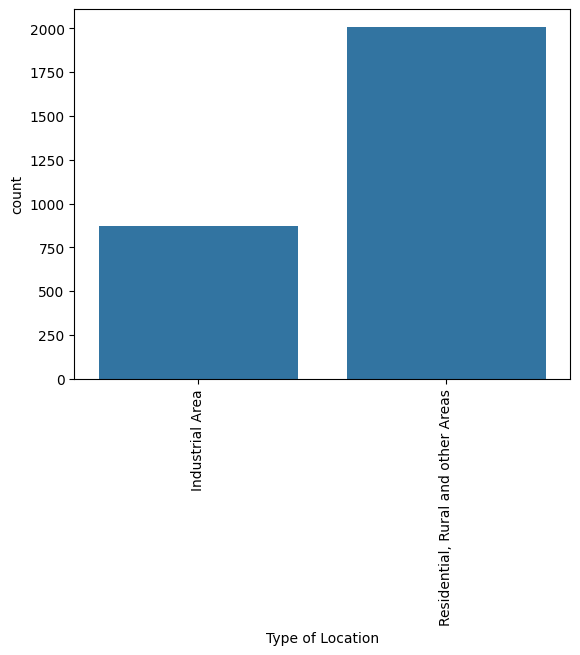

In [25]:
datacount_ty =sns.countplot(x ="Type of Location",data = tn);
datacount_ty.set_xticklabels(datacount_ty.get_xticklabels(), rotation=90);

In [26]:
tn.head()


,State,City/Town/Village/Area,Type of Location,SO2,NO2,RSPM/PM10
0,Tamil Nadu,Chennai,Industrial Area,11.0,17.0,55.0
1,Tamil Nadu,Chennai,Industrial Area,13.0,17.0,45.0
2,Tamil Nadu,Chennai,Industrial Area,12.0,18.0,50.0
3,Tamil Nadu,Chennai,Industrial Area,15.0,16.0,46.0
4,Tamil Nadu,Chennai,Industrial Area,13.0,14.0,42.0


## Data Visualization


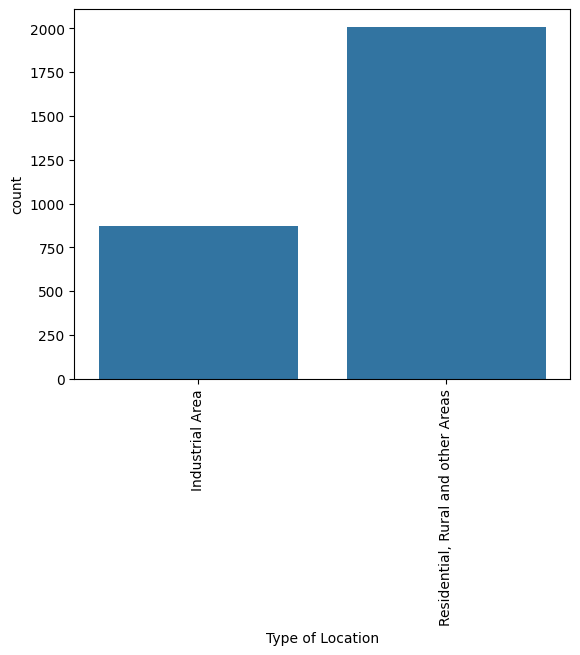

In [27]:
datacount =sns.countplot(x ="Type of Location",data = tn);
datacount.set_xticklabels(datacount.get_xticklabels(), rotation=90);


In [28]:
loc = pd.pivot_table(tn, values=['SO2','NO2'],index='Type of Location') # Aggfunc: default-np.mean()
loc

,NO2,SO2
Type of Location,,
Industrial Area,21.690011,10.871412
"Residential, Rural and other Areas",22.329681,11.794323


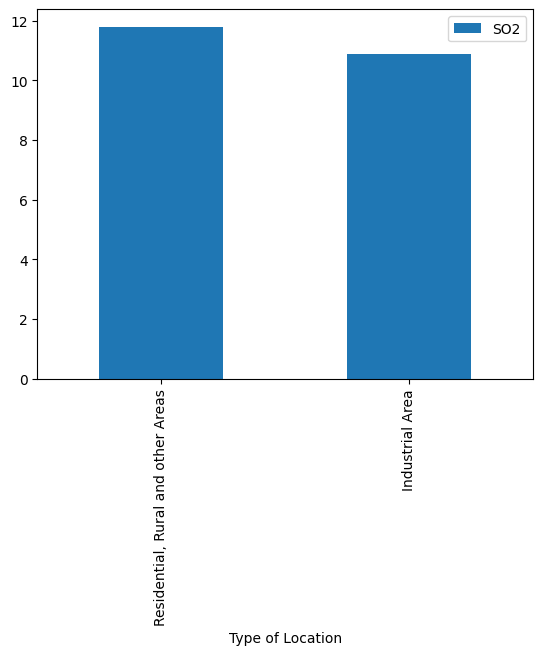

In [29]:
maxso2 = loc.sort_values(by='SO2',ascending=False)
maxso2.loc[:,['SO2']].head(10).plot(kind='bar'); # Based on average values


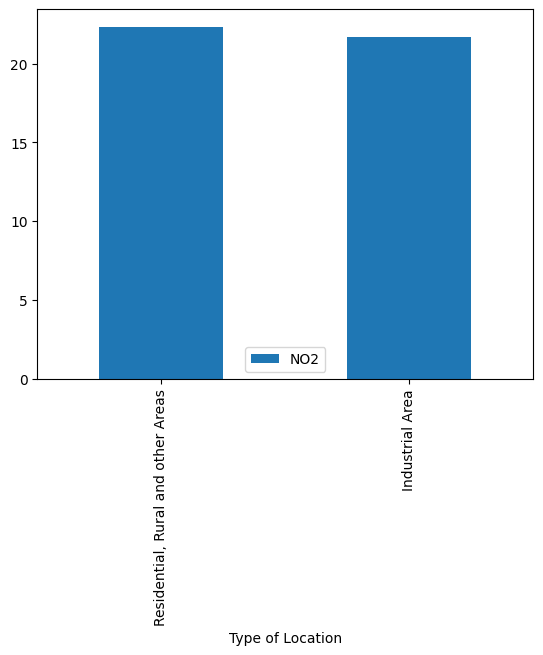

In [30]:
maxno2 = loc.sort_values(by='NO2',ascending=False);
maxno2.loc[:,['NO2']].head(10).plot(kind='bar');


In [31]:
def calculate_si(SO2):
    si=0
    if (SO2<=40):
     si= "s1"
    if (SO2>40 and SO2<=80):
     si= "s2"
    if (SO2>80 and SO2<=380):
     si= "s3"
    if (SO2>380 and SO2<=800):
     si= "s4"
    if (SO2>800 and SO2<=1600):
     si= "s5"
    if (SO2>1600):
     si= "s6"
    return si
tn['si']=tn['SO2'].apply(calculate_si)
ds= tn[['SO2','si']]
ds.tail()

,SO2,si
2874,15.0,s1
2875,12.0,s1
2876,19.0,s1
2877,15.0,s1
2878,14.0,s1


In [35]:
def calculate_ni(NO2):
    ni=0
    if (NO2<=40):
     ni= "n1"
    if (NO2>40 and NO2<=80):
     ni= "n2"
    if (NO2>80 and NO2<=180):
     ni= "n3"
    if (NO2>180 and NO2<=280):
     ni= "n4"
    if (NO2>280 and NO2<=400):
     ni= "n5"
    if (NO2>400):
     ni= "n6"
    return ni
tn['ni']=tn['NO2'].apply(calculate_ni)
dn= tn[['NO2','ni']]
dn.tail()

,NO2,ni
2874,18.0,n1
2875,14.0,n1
2876,22.0,n1
2877,17.0,n1
2878,16.0,n1


In [32]:
tn.sample(2)


,State,City/Town/Village/Area,Type of Location,SO2,NO2,RSPM/PM10,si
2478,Tamil Nadu,Thoothukudi,Industrial Area,14.0,19.0,67.0,s1
2827,Tamil Nadu,Trichy,"Residential, Rural and other Areas",17.0,21.0,114.0,s1


In [33]:
tn.head()

,State,City/Town/Village/Area,Type of Location,SO2,NO2,RSPM/PM10,si
0,Tamil Nadu,Chennai,Industrial Area,11.0,17.0,55.0,s1
1,Tamil Nadu,Chennai,Industrial Area,13.0,17.0,45.0,s1
2,Tamil Nadu,Chennai,Industrial Area,12.0,18.0,50.0,s1
3,Tamil Nadu,Chennai,Industrial Area,15.0,16.0,46.0,s1
4,Tamil Nadu,Chennai,Industrial Area,13.0,14.0,42.0,s1


In [38]:
def calculate_rspm_pm10(rspm_pm10):
    index = 0
    if rspm_pm10 <= 50:
        index = "rp1"
    elif rspm_pm10 > 50 and rspm_pm10 <= 100:
        index = "rp2"
    elif rspm_pm10 > 100 and rspm_pm10 <= 250:
        index = "rp3"
    elif rspm_pm10 > 250 and rspm_pm10 <= 350:
        index = "rp4"
    elif rspm_pm10 > 350 and rspm_pm10 <= 430:
        index = "rp5"
    elif rspm_pm10 > 430:
        index = "rp6"
    return index

# Assuming tn is your DataFrame and 'RSPM' is the correct column name containing RSPM/PM10 values
tn['rspm_pm10_index'] = tn['RSPM/PM10'].apply(calculate_rspm_pm10)
dn_rspm_pm10 = tn[['RSPM/PM10', 'rspm_pm10_index']]
dn_rspm_pm10.tail()


,RSPM/PM10,rspm_pm10_index
2874,102.0,rp3
2875,91.0,rp2
2876,100.0,rp2
2877,95.0,rp2
2878,94.0,rp2


  MonitoringStation   City   SO2   NO2  RSPM_PM10
0                 A  City1  10.0  30.0       50.0
1                 B  City2  20.0  40.0       60.0
2                 C  City1  30.0  50.0       70.0
3                 D  City2  15.0  35.0       55.0
4                 E  City1  25.0  45.0       65.0


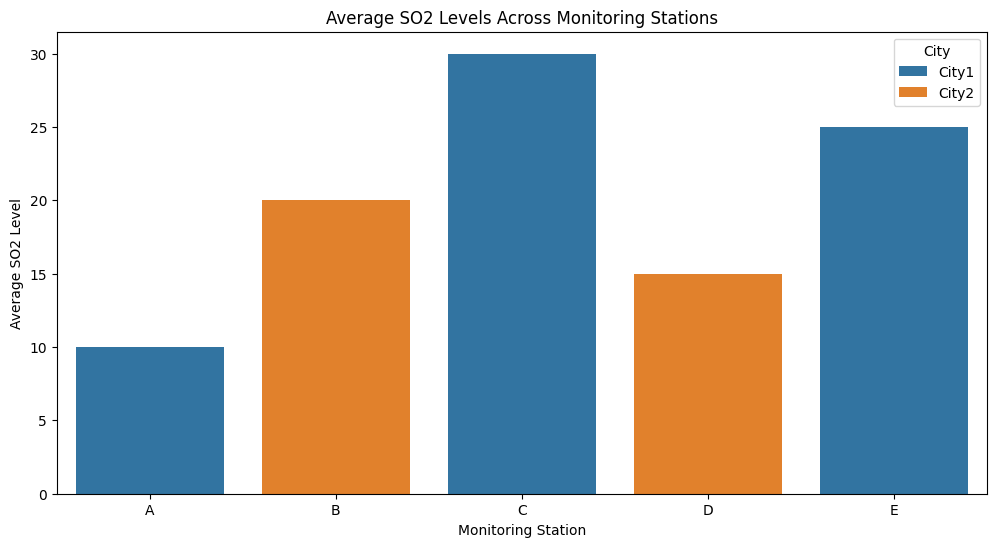

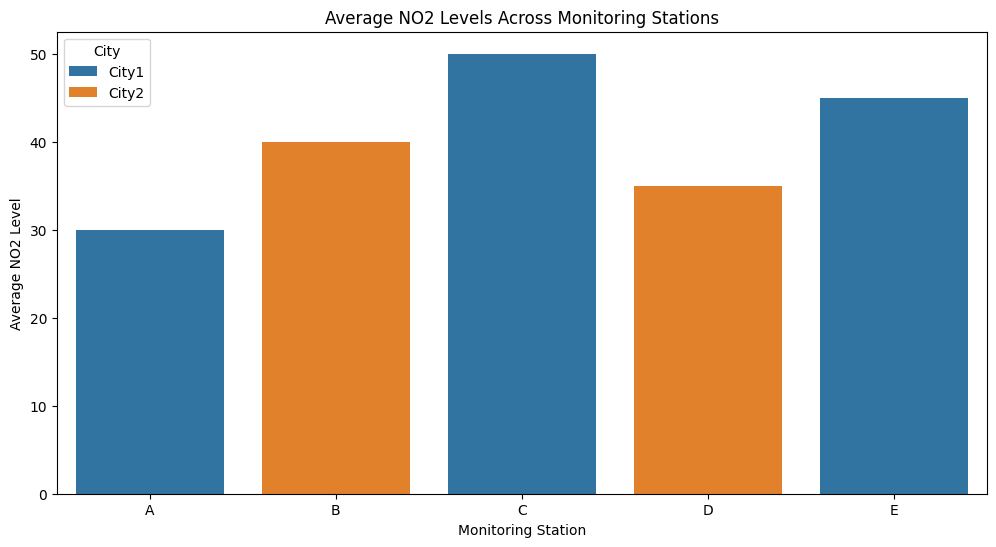

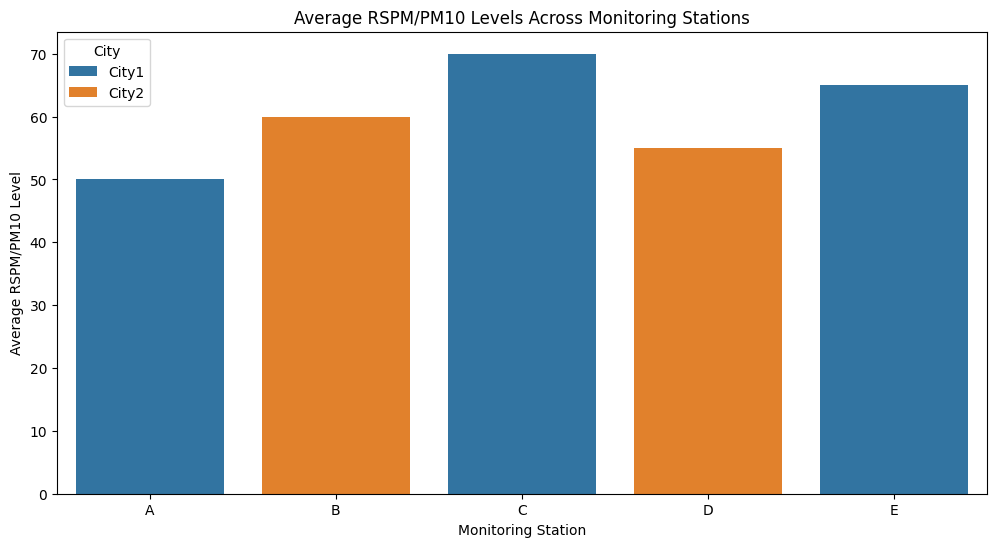

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'data' with columns 'SO2', 'NO2', 'RSPM_PM10', 'MonitoringStation', 'City'
# Replace these column names with your actual column names

# Example data (replace this with your actual data)
data = pd.DataFrame({
    'SO2': [10, 20, 30, 15, 25],
    'NO2': [30, 40, 50, 35, 45],
    'RSPM_PM10': [50, 60, 70, 55, 65],
    'MonitoringStation': ['A', 'B', 'C', 'D', 'E'],
    'City': ['City1', 'City2', 'City1', 'City2', 'City1']
})

# Calculate average levels across different monitoring stations, cities, or areas
average_levels = data.groupby(['MonitoringStation', 'City']).mean().reset_index()

# Print the average levels
print(average_levels)

# Create visualizations
# Bar plot for average SO2 levels
plt.figure(figsize=(12, 6))
sns.barplot(x='MonitoringStation', y='SO2', data=average_levels, hue='City')
plt.title('Average SO2 Levels Across Monitoring Stations')
plt.xlabel('Monitoring Station')
plt.ylabel('Average SO2 Level')
plt.show()

# Bar plot for average NO2 levels
plt.figure(figsize=(12, 6))
sns.barplot(x='MonitoringStation', y='NO2', data=average_levels, hue='City')
plt.title('Average NO2 Levels Across Monitoring Stations')
plt.xlabel('Monitoring Station')
plt.ylabel('Average NO2 Level')
plt.show()

# Bar plot for average RSPM/PM10 levels
plt.figure(figsize=(12, 6))
sns.barplot(x='MonitoringStation', y='RSPM_PM10', data=average_levels, hue='City')
plt.title('Average RSPM/PM10 Levels Across Monitoring Stations')
plt.xlabel('Monitoring Station')
plt.ylabel('Average RSPM/PM10 Level')
plt.show()


In [ ]:
sssss